In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.ndimage.measurements import label as label_region
from scipy.ndimage.measurements import find_objects
import seaborn as sns
pal = sns.color_palette('pastel')
import xarray as xr
import warnings
warnings.filterwarnings('ignore')

In [63]:
file_name   = '/home/christian/Documents/PDD_model/data/ann_msl_Drake.csv' 
ann_MSL     = pd.read_csv(file_name, sep='\t', index_col=['time'], parse_dates=['time'])
ann_MSL.columns = ['msl_drake']

In [64]:
file_name   = '/home/christian/CLIMATE/antartida/indices/data/SAM_ENSO_index.csv'
SAM_ENSO    = pd.read_csv(file_name, sep='\t', index_col=['time'], parse_dates=['time'])
file_name   = '/home/christian/CLIMATE/antartida/processing/data/month_extseries.txt' 
INDICES     = pd.read_csv(file_name, sep=';', index_col=['time'], parse_dates=['time'])
Ind = xr.Dataset.from_dataframe(INDICES)
Ind_ds = Ind.groupby('time.month') - Ind.groupby('time.month').mean('time')
Ind_ds = Ind_ds.drop_vars('month')
INDICES_ann = Ind_ds.to_dataframe()
INDICES_ALL = pd.concat([SAM_ENSO, INDICES_ann, ann_MSL], axis=1).loc['19700101':'20200331']

In [65]:
INDICES_ALL.columns

Index(['SAM', 'NINO3.4', 'NINO4', 'NINO3', 'z200_drake', 'z300_drake',
       'z500_drake', 'z700_drake', 'z850_drake', 'sst_drake', 'sie_drake',
       't300_drake', 't500_drake', 't700_drake', 't850_drake', 'msl_drake',
       'sst_ABS', 'sst_WS', 'sst_WWS', 'sie_ABS', 'sie_WS', 'sie_WWS',
       'asl_mean', 'olr_mean', 'sasdn_mean', 'sasds_mean', 'msl_drake'],
      dtype='object')

In [66]:
ind_sel = ['NINO3.4', 'olr_mean', 'SAM', 't700_drake', 'z500_drake']
INDICES_ALL[ind_sel]

,NINO3.4,olr_mean,SAM,t700_drake,z500_drake
time,,,,,
1970-01-01,0.27,-2.834238,0.76,1.654752,98.930457
1970-02-01,0.21,3.549474,1.27,-0.261799,-18.045561
1970-03-01,-0.10,0.831924,-2.26,-0.089646,31.394555
1970-04-01,0.03,0.949310,-1.57,-1.191785,-63.223686
1970-05-01,-0.18,-11.053453,0.24,-1.573178,-61.548918
...,...,...,...,...,...
2019-11-01,0.59,-8.929561,-4.42,1.578777,35.192333
2019-12-01,0.56,3.950152,-1.78,0.689326,27.370092
2020-01-01,0.60,9.255402,0.57,1.552580,16.840157


In [67]:
## Glacier
path = '/home/christian/COSIPY/cosipy_ssi/data/output_optm/SSI_ERA5_optm_19690101-20200331.nc'
ds   = xr.open_dataset(path)

df_gla = ds[['surfMB', 'SNOWFALL', 'surfM', 'Q']].mean(('lat','lon')).resample(time='1MS').sum('time').to_dataframe().loc['19700101':'20200331'] * 1000
df_gla.columns = ['SMB', 'SF', 'MELT', 'RUNOFF']
df_gla

,SMB,SF,MELT,RUNOFF
time,,,,
1970-01-01,-102.967127,6.970757,110.068271,116.718099
1970-02-01,-37.084869,24.607852,62.180025,65.062313
1970-03-01,-4.534341,43.946383,50.387191,52.138195
1970-04-01,60.153279,85.073534,17.275365,17.529745
1970-05-01,49.327014,51.981629,0.094874,0.016426
...,...,...,...,...
2019-11-01,3.660423,53.448592,39.924256,41.943535
2019-12-01,-60.329902,34.192465,89.788280,94.870945
2020-01-01,-326.699886,3.018872,329.900548,348.907626


In [68]:
data_clim_gla = pd.concat([INDICES_ALL[ind_sel], df_gla], axis=1)
data_clim_gla.to_csv('Bell_clim_glac_1970_2020.csv', index=True, sep='\t')

In [69]:
data_clim_gla

,NINO3.4,olr_mean,SAM,t700_drake,z500_drake,SMB,SF,MELT,RUNOFF
time,,,,,,,,,
1970-01-01,0.27,-2.834238,0.76,1.654752,98.930457,-102.967127,6.970757,110.068271,116.718099
1970-02-01,0.21,3.549474,1.27,-0.261799,-18.045561,-37.084869,24.607852,62.180025,65.062313
1970-03-01,-0.10,0.831924,-2.26,-0.089646,31.394555,-4.534341,43.946383,50.387191,52.138195
1970-04-01,0.03,0.949310,-1.57,-1.191785,-63.223686,60.153279,85.073534,17.275365,17.529745
1970-05-01,-0.18,-11.053453,0.24,-1.573178,-61.548918,49.327014,51.981629,0.094874,0.016426
...,...,...,...,...,...,...,...,...,...
2019-11-01,0.59,-8.929561,-4.42,1.578777,35.192333,3.660423,53.448592,39.924256,41.943535
2019-12-01,0.56,3.950152,-1.78,0.689326,27.370092,-60.329902,34.192465,89.788280,94.870945
2020-01-01,0.60,9.255402,0.57,1.552580,16.840157,-326.699886,3.018872,329.900548,348.907626


In [70]:
data_clim_gla.corr()

,NINO3.4,olr_mean,SAM,t700_drake,z500_drake,SMB,SF,MELT,RUNOFF
NINO3.4,1.000000,0.211323,-0.045186,0.009965,0.081015,0.040443,0.024410,-0.045769,-0.045974
olr_mean,0.211323,1.000000,0.000319,0.157518,0.131046,-0.013556,0.004789,0.017445,0.017030
SAM,-0.045186,0.000319,1.000000,0.070443,-0.215430,-0.123607,-0.003528,0.147057,0.146149
t700_drake,0.009965,0.157518,0.070443,1.000000,0.753251,-0.171627,-0.198843,0.149089,0.148305
z500_drake,0.081015,0.131046,-0.215430,0.753251,1.000000,-0.142592,-0.405713,0.041314,0.041984
SMB,0.040443,-0.013556,-0.123607,-0.171627,-0.142592,1.000000,0.743587,-0.973875,-0.974736
SF,0.024410,0.004789,-0.003528,-0.198843,-0.405713,0.743587,1.000000,-0.574358,-0.577547
MELT,-0.045769,0.017445,0.147057,0.149089,0.041314,-0.973875,-0.574358,1.000000,0.999937
RUNOFF,-0.045974,0.017030,0.146149,0.148305,0.041984,-0.974736,-0.577547,0.999937,1.000000


In [71]:
window = 12
df_SAM = data_clim_gla[['SAM']].copy()
dfm_SAM = df_SAM.rolling(window=window, center=True, min_periods=1).mean()


In [72]:
nx = len(df_SAM['SAM'])
xtime = np.arange(nx)

In [73]:
#ENSO

df = data_clim_gla[['NINO3.4']].copy()

window = 5
dfm = df.reset_index(drop=True).rolling(window=window, center=True, min_periods=1).mean()

thres = 0.5
r, nr = label_region(df['NINO3.4'] > thres)
nr = [i+1 for i, o in enumerate(find_objects(r)) if (len(r[o]) >= 6)]
is_nino = [ri in nr for ri in r]

r, nr = label_region(df['NINO3.4'] < (-thres))
nr = [i+1 for i, o in enumerate(find_objects(r)) if (len(r[o]) >= 6)]
is_nina = [ri in nr for ri in r]

df['is_nina'] = is_nina
df['is_nino'] = is_nino
df['is_neutral'] = ~(df['is_nina'] | df['is_nino'])
tspans = np.linspace(0, nx, nx*2+1)
isnino = np.interp(tspans, xtime, df['is_nino'].values.astype(float)) != 0
isnina = np.interp(tspans, xtime, df['is_nina'].values.astype(float)) != 0


In [74]:
#df_all.to_csv('Climate_mode_glacirs_vars.csv', sep = '\t', index=True)
#df_all.to_excel('Climate_mode_glacirs_vars.xlsx', index=True)

In [75]:
majorTickNames = np.arange(11)*5 + 1970
majorTickNames
majorTickPos = np.array([])
for y in majorTickNames:
    majorTickPos = np.append(majorTickPos, np.where((df_SAM.index.month == 1) &
                                                    (df_SAM.index.year == y))[0])
majorTickPos

array([  0.,  60., 120., 180., 240., 300., 360., 420., 480., 540., 600.])

In [76]:
minorTickNames = np.arange(1970, 2021, 1)
minorTickPos = np.array([])
for y in minorTickNames:
    minorTickPos = np.append(minorTickPos, np.where((df_SAM.index.month == 1) &
                                                    (df_SAM.index.year == y))[0])

In [77]:
window = 6
Z500_drake = data_clim_gla['z500_drake'].rolling(window=window, center=True, min_periods=1).mean()

In [78]:
data_clim_gla.columns

Index(['NINO3.4', 'olr_mean', 'SAM', 't700_drake', 'z500_drake', 'SMB', 'SF',
       'MELT', 'RUNOFF'],
      dtype='object')

In [79]:
data_clim_gla.to_csv('Climate_glacirs_vars.csv', sep = '\t', index=True)

127

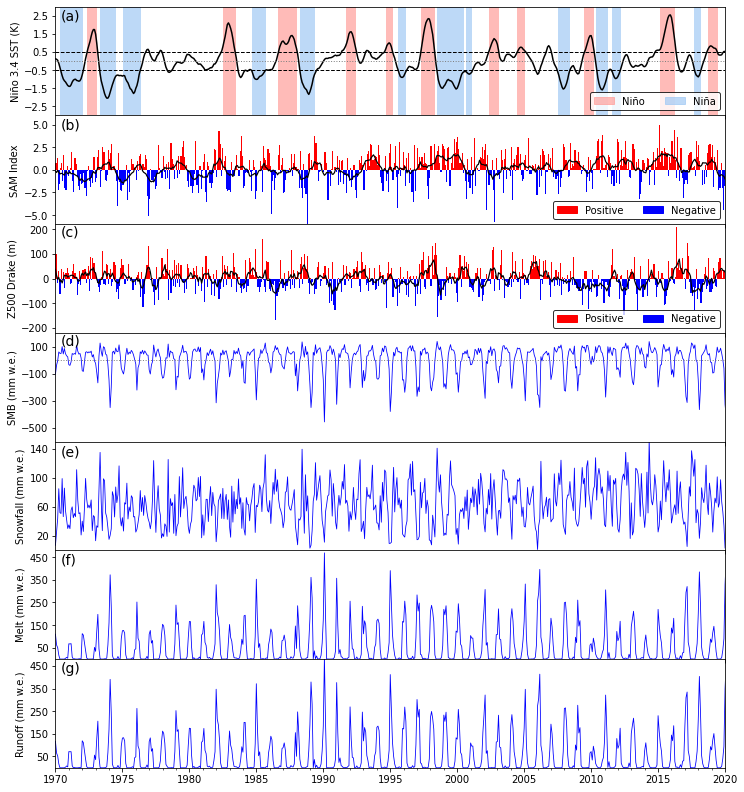

In [81]:
fig = plt.figure(figsize=(12, 14))
gs = fig.add_gridspec(7, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

axs[0].plot(xtime, dfm['NINO3.4'], color='k')
axs[0].set_ylim([-3.0,3.0])
axs[0].set_yticks(np.arange(-2.5, 3, 1))
axs[0].set_xlim([0, majorTickPos[-1]])

from matplotlib.ticker import AutoMinorLocator
#axs[0].yaxis.set_minor_locator(AutoMinorLocator(4))
axs[0].xaxis.set_ticks(majorTickPos)
axs[0].xaxis.set_ticks(minorTickPos, minor=True)
axs[0].set_xticklabels(majorTickNames)

import matplotlib.collections as collections
span_where = collections.BrokenBarHCollection.span_where
c = span_where(tspans, ymin=-3.0, ymax=3.0, where=isnino, color=pal[3], alpha=0.7, linewidths=0)
axs[0].add_collection(c)
c = span_where(tspans, ymin=-3.0, ymax=3.0, where=isnina, color=pal[0], alpha=0.7, linewidths=0)
axs[0].add_collection(c)

axs[0].axhline(0, linewidth=1, color='grey', linestyle =':')
axs[0].axhline(0.5, linewidth=1, color='k', linestyle ='--')
axs[0].axhline(-0.5, linewidth=1, color='k', linestyle ='--')

import matplotlib.patches as mpatches
pat1 = mpatches.Patch(color=pal[3], alpha=0.7, label=u'Niño')
pat2 = mpatches.Patch(color=pal[0], alpha=0.7, label=u'Niña')
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = 'True'
legend = axs[0].legend(handles=[pat1,pat2], loc='lower right', ncol=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)
axs[0].set_ylabel(u'Niño 3.4 SST (K)') 
axs[0].text(5, 2.25,'(a)', fontsize=14)

axs[1].plot(xtime, dfm_SAM['SAM'], color='k', linewidth=1.2)
# Create a list of colors based on the color bar values
colors = ['red' if (value > 0) else 'blue' for value in df_SAM.SAM.values]
axs[1].bar(xtime, 
          df_SAM.SAM.values,
          align='edge',
          edgecolor='none',
          color=colors,
          width=12 / 12,
          linewidth=.3)
axs[1].set_ylim([-6,6])
axs[1].set_yticks(np.arange(-5, 6, 2.5))
#plt.xlim([0, majorTickPos[-1]])

from matplotlib.ticker import AutoMinorLocator
#axs[1].yaxis.set_minor_locator(AutoMinorLocator(4))
axs[1].xaxis.set_ticks(majorTickPos)
axs[1].xaxis.set_ticks(minorTickPos, minor=True)
axs[1].set_xticklabels(majorTickNames)

import matplotlib.patches as mpatches
pat1 = mpatches.Patch(color='red', label=u'Positive')
pat2 = mpatches.Patch(color='blue', label=u'Negative')
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = 'True'
legend = axs[1].legend(handles=[pat1,pat2], loc='lower right', ncol=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)
axs[1].set_ylabel(u'SAM Index') 
axs[1].text(5, 4.5,'(b)', fontsize=14)

axs[2].plot(xtime, Z500_drake, color='k', linewidth=1.2)
# Create a list of colors based on the color bar values
colors = ['red' if (value > 0) else 'blue' for value in data_clim_gla['z500_drake']]
axs[2].bar(xtime, 
          data_clim_gla['z500_drake'],
          align='edge',
          edgecolor='none',
          color=colors,
          width=12 / 12,
          linewidth=.3)
axs[2].set_ylim([-220,220])
#axs[2].set_yticks(np.arange(-14, 16, 7))
#plt.xlim([0, majorTickPos[-1]])

from matplotlib.ticker import AutoMinorLocator
#axs[1].yaxis.set_minor_locator(AutoMinorLocator(4))
axs[2].xaxis.set_ticks(majorTickPos)
axs[2].xaxis.set_ticks(minorTickPos, minor=True)
axs[2].set_xticklabels(majorTickNames)

import matplotlib.patches as mpatches
pat1 = mpatches.Patch(color='red', label=u'Positive')
pat2 = mpatches.Patch(color='blue', label=u'Negative')
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = 'True'
legend = axs[2].legend(handles=[pat1,pat2], loc='lower right', ncol=2)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
frame.set_linewidth(1)
axs[2].set_ylabel(u'Z500 Drake (m)') 
axs[2].text(5, 170,'(c)', fontsize=14)

axs[3].plot(xtime, df_gla['SMB'], color='b', linewidth=0.8)
axs[3].axhline(0, linewidth=1, color='grey', linestyle =':')
axs[3].set_ylim([-600,200])
axs[3].set_yticks(np.arange(-500, 250, 200))
#axs[2]._set_xlim([0, majorTickPos[-1]])
from matplotlib.ticker import AutoMinorLocator
#axs[2].yaxis.set_minor_locator(AutoMinorLocator(4))
axs[3].xaxis.set_ticks(majorTickPos)
axs[3].xaxis.set_ticks(minorTickPos, minor=True)
axs[3].set_xticklabels(majorTickNames)
axs[3].set_ylabel(u'SMB (mm w.e.)') 
axs[3].text(5, 110,'(d)', fontsize=14)

axs[4].plot(xtime, df_gla['SF'], color='b', linewidth=0.8)
axs[4].set_ylim([0,150])
axs[4].set_yticks(np.arange(20, 150, 40))
#axs[2]._set_xlim([0, majorTickPos[-1]])
from matplotlib.ticker import AutoMinorLocator
#axs[2].yaxis.set_minor_locator(AutoMinorLocator(4))
axs[4].xaxis.set_ticks(majorTickPos)
axs[4].xaxis.set_ticks(minorTickPos, minor=True)
axs[4].set_xticklabels(majorTickNames)
axs[4].set_ylabel(u'Snowfall (mm w.e.)') 
axs[4].text(5, 130,'(e)', fontsize=14)

axs[5].plot(xtime, df_gla['MELT'], color='b', linewidth=0.8)
axs[5].set_ylim([0,480])
axs[5].set_yticks(np.arange(50, 550, 100))
#axs[2]._set_xlim([0, majorTickPos[-1]])
from matplotlib.ticker import AutoMinorLocator
#axs[2].yaxis.set_minor_locator(AutoMinorLocator(4))
axs[5].xaxis.set_ticks(majorTickPos)
axs[5].xaxis.set_ticks(minorTickPos, minor=True)
axs[5].set_xticklabels(majorTickNames)
axs[5].set_ylabel(u'Melt (mm w.e.)') 
axs[5].text(5, 420,'(f)', fontsize=14)

axs[6].plot(xtime, df_gla['RUNOFF'], color='b', linewidth=0.8)
axs[6].set_ylim([0,480])
axs[6].set_yticks(np.arange(50, 550, 100))
#axs[2]._set_xlim([0, majorTickPos[-1]])
from matplotlib.ticker import AutoMinorLocator
#axs[2].yaxis.set_minor_locator(AutoMinorLocator(4))
axs[6].xaxis.set_ticks(majorTickPos)
axs[6].xaxis.set_ticks(minorTickPos, minor=True)
axs[6].set_xticklabels(majorTickNames)
axs[6].set_ylabel(u'Runoff (mm w.e.)') 
axs[6].text(5, 420,'(g)', fontsize=14)

fig.savefig('Bell_Glac_1970-2020.png',dpi = 200, bbox_inches = 'tight', 
            pad_inches = 0.1, facecolor='w')

fig.savefig('Bell_Glac_1970-2020.svg',dpi = 200, bbox_inches = 'tight', 
            pad_inches = 0.1, facecolor='w')

import subprocess
subprocess.call('Bell_Glac_1970-2020.svg -M Bell_Glac_1970-2020.emf',shell=True)